Ce Notebook présente la préparation du jeu de données Kaggle "1.8 Million Wildfires" afin de prédire la taille des feux de forêt, en termes de superficie brûlée.

Dans cette version, le nombre de catégories des feux a été limité à trois:

- Catégorie 1: feux de taille inférieur à 1 acre (0.4 ha), la moitié de la surface d'un terrain de football
- Catégorie 2: feux avec une taille comprise entre 1 et 20 acres (=8 ha, soit la Place de la Concorde)
- Catégorie 3: feux avec une taille supérieure à 20 acres

## I - Préparation du jeu de données

### Importation des packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier    
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### Sélection des variables et préparation du jeu de données

In [21]:
# Import des données et suppression des variables "inutiles"
df = pd.read_csv('C:\\Users\\mlant\\Desktop\\fire_data.csv',encoding = 'ISO-8859-1')

df = df.drop(labels=['objectid','fpa_id', 'local_fire_report_id','local_incident_id','fire_code','fire_name',
                     'ics_209_incident_number', 'ics_209_name', 'mtbs_id','mtbs_fire_name','complex_name',
                    'discovery_time','county','fips_code','shape', "owner_code", 'fips_name',
                    'nwcg_reporting_unit_id', 'source_system_type','source_system','nwcg_reporting_agency',
                    'nwcg_reporting_unit_name',
                    'source_reporting_unit','source_reporting_unit_name','discovery_doy','stat_cause_code',
                    'cont_date','cont_doy','cont_time'], axis=1)


df['discovery_date'] = pd.to_datetime(df['discovery_date'] - pd.Timestamp(0).to_julian_date(), unit='D')

# Ajout de la dénomination "longue" des Etats
states_short = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'RI']

states = ['Alaska','Alabama','Arkansas','Arizona','California','Colorado','Connecticut','District of Columbia','Delaware',
          'Florida','Georgia','Hawaii','Iowa','Idaho','Illinois','Indiana','Kansas','Kentucky','Louisiana','Massachusetts',
          'Maryland','Maine','Michigan','Minnesota','Missouri','Mississippi','Montana','North Carolina','North Dakota',
          'Nebraska','New Hampshire','New Jersey','New Mexico','Nevada','New York','Ohio','Oklahoma','Oregon',
          'Pennsylvania', "Puerto Rico", 'South Carolina','South Dakota','Tennessee','Texas','Utah', 'Virginia','Vermont',
          'Washington','Wisconsin','West Virginia','Wyoming','Rhode Island']

df["states_long"] = df["state"]
df["states_long"] = df["states_long"].replace(to_replace = states_short, value = states)

# Ajout de la densité de population de l'Etat
dict_dens = {'Alabama': 95.4, 'Alaska': 1.3, 'Arizona': 58.3, 'Arkansas': 56.9, 'California': 246.1, 'Colorado': 50.8, 'Connecticut': 742.6, 'Delaware': 475.1, 'District of Columbia': 4361, 'Florida': 364.6, 'Georgia': 173.7, 'Hawaii': 218.6, 'Idaho': 19.5, 'Illinois': 232.2, 'Indiana': 183.4, 'Iowa': 55.3, 'Kansas': 35.4, 'Kentucky': 111.3, 'Louisiana': 107.1, 'Maine': 43.1, 'Maryland': 610.8, 'Massachusetts': 858, 'Michigan': 175, 'Minnesota': 68.1, 'Mississippi': 63.7, 'Missouri': 87.9, 'Montana': 7, 'Nebraska': 24.3, 'Nevada': 25.4, 'New Hampshire': 147.8, 'New Jersey': 1210.1, 'New Mexico': 17.2, 'New York': 417, 'North Carolina': 202.6, 'North Dakota': 10.5, 'Ohio': 283.2, 'Oklahoma': 56.1, 'Oregon': 40.9, 'Pennsylvania': 285.5, 'Puerto Rico': 835, 'Rhode Island': 1017, 'South Carolina': 158.8, 'South Dakota': 11.1, 'Tennessee': 157.5, 'Texas': 101.2, 'Utah': 35.3, 'Vermont': 68, 'Virginia': 209.2, 'Washington': 104.9, 'West Virginia': 77.1, 'Wisconsin': 106, 'Wyoming': 6}
df['state_density']= df['states_long']
df['state_density']= df['states_long'].replace(dict_dens)

# Ajout de la variable "couverture forestière" par Etat
dict_forestcover = {'Maine':89.46,'New Hampshire':84.32,'American Samoa':80.84,'Northern Mariana Islands':80.37,'West Virginia':79.01,'Vermont':77.81,'Alabama':70.57,'South Carolina':68.19,'Georgia':67.28,'Mississippi':65.07,'Virginia':62.93,'New York':62.88,'Massachusetts':60.57,'North Carolina':59.73,'Pennsylvania':58.60,'United States Virgin Islands Virgin Islands (U.S.)':57.16,'Arkansas':56.31,'Puerto Rico':55.62,'Michigan':55.62,'Connecticut':55.24,'Rhode Island':54.38,'Louisiana':53.20,'Tennessee':52.83,'Guam':52.82,'Washington':52.74,'Florida':50.68,'Kentucky':49.35,'Wisconsin':48.98,'Oregon':48.51,'Hawaii':42.53,'New Jersey':41.72,'Idaho':40.55,'Maryland':39.36,'Texas':37.33,'Missouri':35.16,'Alaska':35.16,'Utah':34.48,'Colorado':34.42,'Minnesota':34.08,'District of Columbia':33.90,'California':32.71,'New Mexico':31.99,'Ohio':30.92,'Oklahoma':28.80,'Montana':27.45,'Delaware':27.26,'Arizona':25.64,'Indiana':21.06,'Wyoming':18.42,'Nevada':15.89,'Illinois':13.64,'Iowa':9.43,'Kansas':4.78,'South Dakota':3.93,'Nebraska':3.20,'North Dakota':1.72}
df['forest_coverage']= df['states_long']
df['forest_coverage']= df['states_long'].replace(dict_forestcover)

# Ajout du nombre de casernes de pompiers par Etat
dict_firestations_count = {'AK': 354,'AL': 1544,'AR': 1352,'AZ': 566,'CA': 3150,'CO': 858,'CT': 569,'DC': 35,'DE': 87,'FL': 1718,'GA': 1748,'HI': 106,'IA': 880,'ID': 402,'IL': 1840,'IN': 1251,'KS': 983,'KY': 1184,'LA': 1081,'MA': 760,'MD': 509,'ME': 567,'MI': 1444,'MN': 977,'MO': 1543,'MS': 1043,'MT': 460,'NC': 1904,'ND': 341,'NE': 539,'NH': 327,'NJ': 1277,'NM': 620,'NV': 262,'NY': 2654,'OH': 1824,'OK': 1189,'OR': 718,'PA': 2613,'PR': 94,'RI': 161,'SC': 1134,'SD': 383,'TN': 1414,'TX': 2886,'UT': 391,'VA': 1009,'VI': 13,'VT': 279,'WA': 1280,'WI': 1082,'WV': 559,'WY': 220}
df['firestations_count']= df['state'].replace(dict_firestations_count)

# Transformation du mois en variable catégorielle
month_dict = {1:'jan', 2:'fev',3:'mars',4:'avril',5:'mai',6:'juin',7:'juill',8:'aout',9:'sept',
              10:'oct',11:'nov',12:'dec'}
df['month'] = pd.DatetimeIndex(df['discovery_date']).month
df['month'] = df['month'].replace(month_dict)

# Regroupement des causes
cause_dict = {'Lightning':'Natural', 'Debris Burning':'Infrastructure', 'Miscellaneous':'Miscellaneous',
              'Campfire':'Human','Equipment Use':'Human', 'Arson':'Human', 'Children':'Human', 'Railroad':'Infrastructure',
              'Smoking':'Human','Powerline':'Infrastructure', 'Structure':'Infrastructure',
              'Fireworks':'Human', 'Missing/Undefined':'Miscellaneous'}

df['stat_cause_descr'] = df['stat_cause_descr'].replace(cause_dict)

# Fusion du df avec les données météos récupérées
df_full = pd.read_csv('C:\\Users\\mlant\\Desktop\\Projet Formation\\df_full.csv')
df = df.merge(df_full, left_on='fod_id', right_on = 'fod_id', how = 'left')

# Fusion du df avec la distance de la caserne de pompiers la plus proche
df_firestation = pd.read_csv('C:\\Users\\mlant\\Desktop\\Projet formation\\Données météo\\closest_firestation_distance.csv')
df = df.merge(df_firestation, left_on='fod_id',right_on='fod_id', how = 'left')

# Suppression de certaines colonnes et des lignes avec des valeurs manquantes
df = df[(df['daily_avg_temp'] != 0.0) & (df['daily_min_temp'] != 0.0) & (df['daily_max_temp'] != 0.0)]
df = df[df['daily_avg_temp'].notnull()]
df = df[df['days_collected'] > 45]
df = df.drop(labels = ['states_long','Unnamed: 0', 'fod_id', 'discovery_date', 'days_collected', 'daily_pres', 'daily_snow','daily_wspd','daily_wdir','daily_wpgt','daily_tsun'], axis = 1)
df = df.dropna()

In [7]:
#vérification valeurs nulles avec nouvelle variable forest_coverage
df.forest_coverage.isna().sum()

0

In [22]:
df.loc[df['fire_size']<1, 'new_cat']=1
df.loc[(df['fire_size']>=1)&(df['fire_size']<20), 'new_cat']=2
df.loc[(df['fire_size']>=20)&(df['fire_size']<1000000), 'new_cat']=3

In [23]:
df=df.drop('fire_size_class', axis=1)

In [24]:
df=df.drop('fire_size', axis=1)

In [25]:
df.new_cat=df.new_cat.astype('int')

In [26]:
# Transformation des coordonnées en variables catégorielles
import pygeohash as pgh
create_geohash = lambda row: pgh.encode(row['latitude'], row['longitude'], 2)
df["geohash"] = df[["latitude", "longitude"]].apply(create_geohash, axis=1)

# Transformation de la variable "year" en variable catégorielle
df['fire_year'] = df['fire_year'].astype(str)

# Transformation des variables catégorielles
df_categorical = df.select_dtypes(include=["object"])
df_categorical = pd.get_dummies(df_categorical, dummy_na=False, drop_first=True)

# Fusion avec le df
df = pd.concat([df, df_categorical], axis=1)
df = df.select_dtypes(exclude=["object"])
df = df.drop(columns=['latitude','longitude'])

### Séparation jeu d'entraînement et jeu de test, Normalisation

In [27]:
data = df.drop("new_cat", axis = 1)
target = df["new_cat"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66, stratify = target )

In [29]:
# On normalise nos données :
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## II -  Entraînement de modèles de classification : SGD, RF, DT, XGBoost

### SGD

In [13]:
# Définition du modèle
sgd = SGDClassifier()

# Entraînement du modèle
sgd.fit(X_train_scaled, y_train)
print("test score du sgd : {}".format(sgd.score(X_test_scaled, y_test)))
print("train score du sgd : {}".format(sgd.score(X_train_scaled, y_train)))

# Prédiction du modèle
y_pred = sgd.predict(X_test)

test score du sgd : 0.6408263139940696
train score du sgd : 0.6400631085555718


In [14]:
# Matrice de corrélation
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite   1.0     2.0  3.0
Classe réelle                    
1.0             7275  142451    1
2.0             3884  122824    0
3.0              370   28067    0

In [15]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.05      0.09    149727
         2.0       0.42      0.97      0.58    126708
         3.0       0.00      0.00      0.00     28437

    accuracy                           0.43    304872
   macro avg       0.35      0.34      0.23    304872
weighted avg       0.48      0.43      0.29    304872



### RandomForestClassifier

In [16]:
rf = RandomForestClassifier()

# Entraînement du modèle
rf.fit(X_train, y_train)
print("test score du rf : {}".format(rf.score(X_test, y_test)))
print("train score du rf : {}".format(rf.score(X_train, y_train)))

# Prédiction du modèle
y_pred = rf.predict(X_test)

test score du rf : 0.6527985515232623
train score du rf : 0.9966895888923694


In [17]:
# Matrice de corrélation
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite     1.0    2.0   3.0
Classe réelle                      
1.0             115283  32198  2246
2.0              41778  78978  5952
3.0               7710  15968  4759

In [18]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.70      0.77      0.73    149727
         2.0       0.62      0.62      0.62    126708
         3.0       0.37      0.17      0.23     28437

    accuracy                           0.65    304872
   macro avg       0.56      0.52      0.53    304872
weighted avg       0.64      0.65      0.64    304872



### DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()

# Entraînement du modèle
dt.fit(X_train, y_train)
print("test score du dt : {}".format(dt.score(X_test, y_test)))
print("train score du dt : {}".format(dt.score(X_train, y_train)))

# Prédiction du modèle
y_pred = dt.predict(X_test)

test score du dt : 0.5818343435933769
train score du dt : 0.9967109093503328


In [20]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite    1.0    2.0    3.0
Classe réelle                      
1.0             99942  41702   8083
2.0             41370  70548  14790
3.0              7769  13773   6895

In [21]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.67      0.67    149727
         2.0       0.56      0.56      0.56    126708
         3.0       0.23      0.24      0.24     28437

    accuracy                           0.58    304872
   macro avg       0.49      0.49      0.49    304872
weighted avg       0.58      0.58      0.58    304872



### XG Boost

In [22]:
#Préparation des données pour XG Boost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train) 
y_test_xg = le.fit_transform(y_test) 

#Entraînement du modèle XGBoost
!pip install xgboost
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(X_train_scaled, y_train_xg)
print("test score du xg : {}".format(xg.score(X_test_scaled, y_test_xg)))
print("train score du xg : {}".format(xg.score(X_train_scaled, y_train_xg)))

# Prédiction du modèle
y_pred = xg.predict(X_test_scaled)

# Rapport de classification
print(classification_report(y_test_xg, y_pred))

cm = pd.crosstab(y_test_xg, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score du xg : 0.663944212653179
train score du xg : 0.6676903219881163
              precision    recall  f1-score   support

           0       0.70      0.78      0.74    149727
           1       0.62      0.66      0.64    126708
           2       0.56      0.05      0.09     28437

    accuracy                           0.66    304872
   macro avg       0.63      0.50      0.49    304872
weighted avg       0.65      0.66      0.64    304872



Classe prédite       0      1     2
Classe réelle                      
0               117513  31855   359
1                42491  83447   770
2                 8355  18624  1458

Les modèles obtenant un meilleur score sur le jeu de test sont XgBoost et RandomForest.
Cependant les classes minoritaires concernant les feux de grande ampleur sont mal détectées.
Nous allons utiliser le module imblearn pour améliorer la détection de classes minoritaires.

## III -  Classification pour jeux de données déséquilibrés

Il y a 2 familles de méthodes pour les jeux de données déséquilibrés :

1/ L'oversampling => ici l'algorithme est trop long, pas d'obtention de résultats

2/ L'undersampling => celui-ci a été appliqué avec les algorithmes ayant donné les meilleurs résultats

### XG Boost

In [23]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

#Préparation des données pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_ru= [dic_ca[cat] for cat in y_train_ru]
y_test_ru= [dic_ca[cat] for cat in y_test] 

#Entraînement du modèle XGBoost
!pip install xgboost
import xgboost as xgb

xgu = xgb.XGBClassifier()
xgu.fit(X_train_ru, y_train_ru)
print("test score du xgu : {}".format(xgu.score(X_test_scaled, y_test_ru)))
print("train score du xgu : {}".format(xgu.score(X_train_ru, y_train_ru)))

# Re-"labellisation" des catégories de 1 à 4
dic_ca_rev= {0:1, 1:2, 2:3}
y_train_ru= [dic_ca_rev[cat] for cat in y_train_ru]
y_test_ru= [dic_ca_rev[cat] for cat in y_test_ru]

# Prédiction du modèle
y_pred = xgu.predict(X_test_scaled)
y_pred= [dic_ca_rev[cat] for cat in y_pred]

# Rapport de classification
print(classification_report(y_test_ru, y_pred))
cm = pd.crosstab(y_test_ru, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score du xgu : 0.5821721902962554
train score du xgu : 0.6022083904771952
              precision    recall  f1-score   support

           1       0.74      0.69      0.71    149727
           2       0.62      0.45      0.53    126708
           3       0.23      0.59      0.33     28437

    accuracy                           0.58    304872
   macro avg       0.53      0.58      0.52    304872
weighted avg       0.64      0.58      0.60    304872



Classe prédite       1      2      3
Classe réelle                       
1               102966  28201  18560
2                32118  57645  36945
3                 4753   6807  16877

In [24]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_ru,y_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

#Entraînement du modèle Random Forest Classifier
rfu = RandomForestClassifier()
rfu.fit(X_ru, y_ru)
print("test score du rfu : {}".format(rfu.score(X_test_scaled, y_test)))
print("train score du rfu : {}".format(rfu.score(X_ru, y_ru)))

# Prédiction du modèle
y_pred = rfu.predict(X_test_scaled)

# Rapport de classification
print(classification_report(y_test, y_pred))

test score du rfu : 0.579390695111391
train score du rfu : 0.9987486959477676
              precision    recall  f1-score   support

         1.0       0.73      0.68      0.71    149727
         2.0       0.61      0.46      0.52    126708
         3.0       0.23      0.58      0.33     28437

    accuracy                           0.58    304872
   macro avg       0.53      0.57      0.52    304872
weighted avg       0.64      0.58      0.60    304872



In [25]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite     1.0    2.0    3.0
Classe réelle                       
1.0             102492  29104  18131
2.0              32976  57727  36005
3.0               4595   7421  16421

Les résultats sont fortement améliorés pour la classe 3 minoritaire.

## RandomSearch en combinaison avec Imblearn

In [11]:
!pip install xgboost
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

#Préparation des données pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_xgru= [dic_ca[cat] for cat in y_train_ru]
y_test_xgru= [dic_ca[cat] for cat in y_test]

# Recherche des meilleurs paramètres pour le XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5,10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=4, cv=skf.split(X_train_ru, y_train_xgru), verbose=3, random_state=1001 )

random_search.fit(X_train_ru, y_train_xgru)

print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[23:23:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.6}


In [44]:
from xgboost import XGBClassifier

#Préparation des données pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_xgru= [dic_ca[cat] for cat in y_train_ru]
y_test_xgru= [dic_ca[cat] for cat in y_test] 

xgb = XGBClassifier(subsample= 0.6, min_child_weight= 1, max_depth= 4, gamma= 5, colsample_bytree= 0.6)
xgb.fit(X_train_ru, y_train_xgru)
print("test score du xgu : {}".format(xgb.score(X_test_scaled, y_test_xgru)))
print("train score du xgu : {}".format(xgb.score(X_train_ru, y_train_xgru)))

# Re-"labellisation" des catégories de 1 à 7
dic_ca_rev= {0:1, 1:2, 2:3}
y_train_ru= [dic_ca_rev[cat] for cat in y_train_xgru]
y_test_ru= [dic_ca_rev[cat] for cat in y_test_xgru]

# Prédiction du modèle
y_pred = xgb.predict(X_test_scaled)
y_pred= [dic_ca_rev[cat] for cat in y_pred]

# Rapport de classification
print(classification_report(y_test_ru, y_pred))
cm = pd.crosstab(y_test_ru, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score du xgu : 0.571565743384664
train score du xgu : 0.5711490978157645
              precision    recall  f1-score   support

           1       0.72      0.68      0.70    135105
           2       0.62      0.44      0.52    116636
           3       0.23      0.57      0.33     26325

    accuracy                           0.57    278066
   macro avg       0.52      0.57      0.51    278066
weighted avg       0.63      0.57      0.59    278066



Classe prédite      1      2      3
Classe réelle                      
1               92123  25810  17172
2               31025  51685  33926
3                4835   6365  15125

L'optimisation des paramètres avec RandomSearch n'a pas permis d'obtenir un meilleur résultat qu'avec les paramètres par défaut, qui sont les suivants: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 0, 'colsample_bytree': 1}. Le surapprentissage a été cependant réduit.

### V - Interprétation du modèle¶

Le modèle XGBoost est donc le modèle sélectionné dans ce projet. Cependant, il est considéré par beaucoup comme une boîte noire inexplicable.

Nous allons utiliser le package SHAP pour tenter de comprendre comment le modèle a fonctionné et quelles variables ont eu le plus de poids.

In [30]:
!pip install xgboost
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)


!pip install shap
import xgboost as xgb

#Conversion des jeux de données en DMatrix
dtrain = xgb.DMatrix(X_train_ru, y_train_ru)
dtest = xgb.DMatrix(X_test_scaled)

# xgboost paramètres
params = {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.6}

# Entraînement du modèle
model = xgb.train(params, dtrain)
pred = model.predict(dtest)

Nous allons créer la matrice des valeurs SHAP pour chaque individu et chaque variable. Chaque ligne correspond à la différence entre la sortie du modèle pour un individu et la valeur attendue de la sortie du modèle (l'Expected value). Cette différence nous aidera à expliquer pourquoi le modèle est enclin à prédire le résultat d'une classe spécifique.

In [31]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head(7)

Expected Value: 1.9574138


0         1         2    3    4         5         6         7    8    \
0 -0.171081  0.000595 -0.000126  0.0  0.0 -0.005399  0.000115  0.000073  0.0   
1 -0.135162 -0.011992  0.000508  0.0  0.0  0.040239  0.000115  0.000073  0.0   
2 -0.140202 -0.014013  0.000658  0.0  0.0 -0.009231  0.000115  0.000073  0.0   
3  0.095756  0.087201  0.074350  0.0  0.0 -0.008048  0.000312 -0.000141  0.0   
4 -0.164295  0.009919  0.016450  0.0  0.0  0.040190  0.000312  0.000073  0.0   
5  0.099098  0.021259  0.065871  0.0  0.0 -0.011457  0.000312 -0.000141  0.0   
6 -0.041541 -0.027617 -0.129490  0.0  0.0 -0.009388  0.000115  0.000073  0.0   

   9    ...       153       154       155  156  157       158  159  160  161  \
0  0.0  ... -0.001711  0.001545 -0.000214  0.0  0.0  0.016532  0.0  0.0  0.0   
1  0.0  ... -0.002104  0.002355 -0.002347  0.0  0.0  0.018792  0.0  0.0  0.0   
2  0.0  ... -0.001923  0.001545 -0.003994  0.0  0.0  0.018836  0.0  0.0  0.0   
3  0.0  ... -0.002512  0.000632 -0.002347  0.0  0.0  0.012018  0.0  0.0  0.0   
4  0.0  ... -0.002104  0.001545 -0.000289  0.0  0.0  0.021611  0.0  0.0  0.0   
5  0.0  ... -0.001163  0.000632  0.006855  0.0  0.0  0.009995  0.0  0.0  0.0   
6  0.0  ... -0.002512  0.000632 -0.000177  0.0  0.0  0.012159  0.0  0.0  0.0   

   162  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  0.0  

[7 rows x 163 columns]

Affichons les "features importances" obtenues avec SHAP

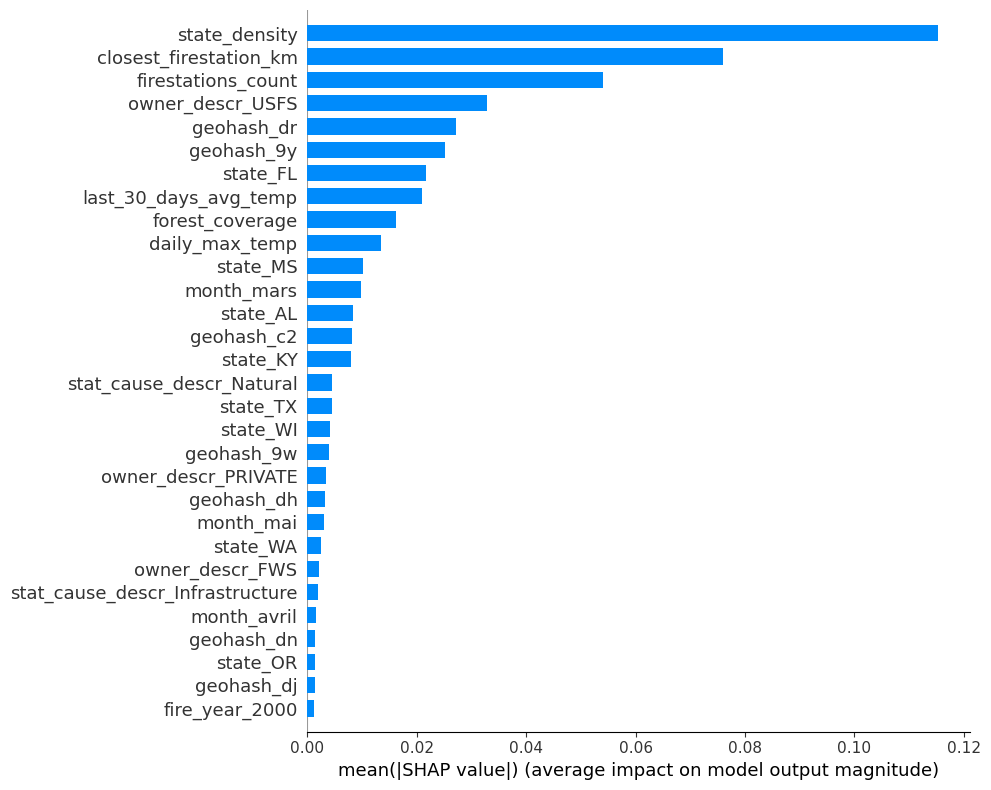

In [32]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(10,8),max_display=30)

Dans le cas des trois catégories, la feature "state_density" se distingue nettement. 

Nous pouvons analyser les dépendances entre variables, par exemple entre la variable de la distance de la caserne de pompiers la plus proche et la densité de population.

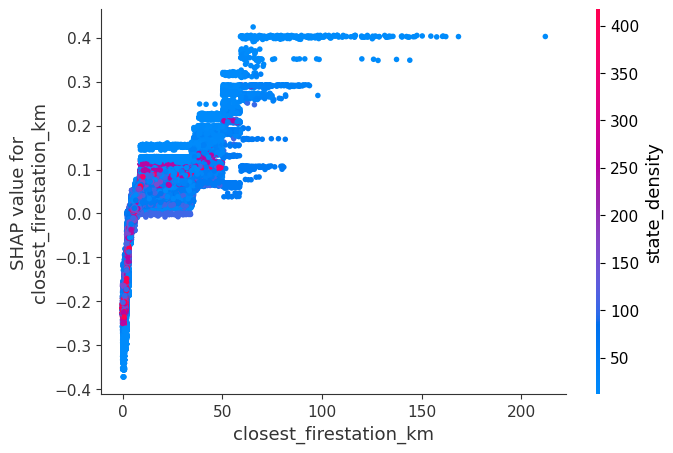

In [38]:
shap.dependence_plot("closest_firestation_km", shap_values, X_test, interaction_index= "state_density")

Nous pouvons ensuite étudier la dépendance entre le mois de mai et les températures du dernier mois.

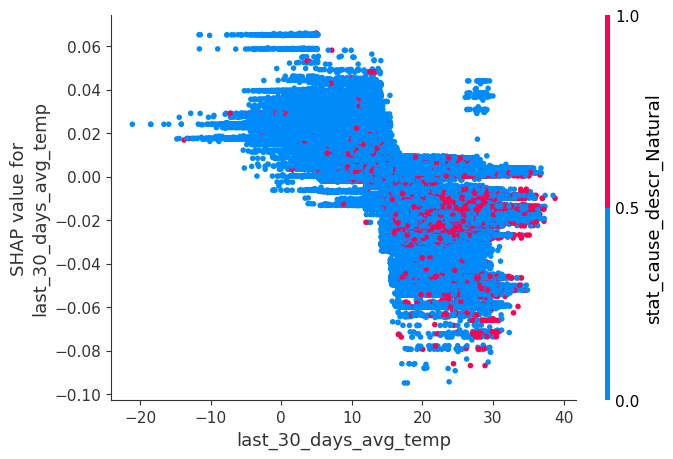

In [41]:
shap.dependence_plot("last_30_days_avg_temp", shap_values, X_test, interaction_index= "stat_cause_descr_Natural")

On peut observer que les causes naturelles sont corrélées davantage avec des températures comprises entre 18 et 35°C.  

In [42]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

L'un des principaux avantages du SHAP est qu'il permet de construire des graphiques globaux interactifs qui peuvent visualiser et expliquer plusieurs prédictions à la fois. Ici, nous visualisons les décisions de prédictions du modèle pour les 1000 premiers échantillons de données de test.

In [43]:
shap.force_plot(explainer.expected_value, shap_values[:1000], X_test[:1000])